In [1]:
import pandas as pd
import numpy as np

In [2]:
dff=pd.read_csv("BDdata.csv")

In [3]:
dff = dff.set_index('year')

In [4]:
dff.tail()

,co2,lifeexpectancy,Infant Mortality Rate,Population Growth Rate,Fertility Rate,GDPpercapita
year,,,,,,
2015,0.459,71.514,3.06,1.117284,2.120,1248.453398
2016,0.467,71.785,2.93,1.091300,2.090,1401.620628
2017,0.493,72.052,2.80,1.070244,2.062,1563.913699
2018,0.513,72.320,2.67,1.050045,2.036,1698.350394
2019,0.660,72.591,2.56,1.042001,2.011,1855.739824


In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [6]:
adf_test(dff['Population Growth Rate'])

1. ADF :  1.1233611407216626
2. P-Value :  0.9954111507264556
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 48
5. Critical Values :
	 1% :  -3.5745892596209488
	 5% :  -2.9239543084490744
	 10% :  -2.6000391840277777


In [7]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
stepwise_fit = auto_arima(dff['Population Growth Rate'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(2, 1, 4)   Log Likelihood                 148.515
Date:                Wed, 13 Oct 2021   AIC                           -283.030
Time:                        23:51:14   BIC                           -268.488
Sample:                             0   HQIC                          -277.353
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3923      0.080     17.362      0.000       1.235       1.549
ar.L2         -0.7718      0.089     -8.686      0.000      -0.946      -0.598
ma.L1          0.8534      0.551      1.548      0.122      -0.227       1.934
ma.L2          0.7794      0.367      2.125      0.034       0.061       1.498
ma.L3          0.8424      1.053      0.800      0.424      -1.222       2.907
ma.L4          0.9500      0.949      1.002      0.317      -0.909       2.809
sigma2         0.0003      0.000      1.124      0.261      -0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                60.61
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
print(dff.shape)
train=dff.iloc[:-30]
test=dff.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(60, 6)
(30, 6) (30, 6)
co2                         0.112000
lifeexpectancy             58.210000
Infant Mortality Rate       9.970000
Population Growth Rate      2.429599
Fertility Rate              4.495000
GDPpercapita              306.268704
Name: 1990, dtype: float64 co2                          0.660000
lifeexpectancy              72.591000
Infant Mortality Rate        2.560000
Population Growth Rate       1.042001
Fertility Rate               2.011000
GDPpercapita              1855.739824
Name: 2019, dtype: float64


In [11]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(dff['Population Growth Rate'],order=(4,1,2))
model1=model.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                 
====================================================================================
Dep. Variable:     D.Population Growth Rate   No. Observations:                   59
Model:                       ARIMA(4, 1, 2)   Log Likelihood                 149.572
Method:                             css-mle   S.D. of innovations              0.017
Date:                      Wed, 13 Oct 2021   AIC                           -283.144
Time:                              23:51:17   BIC                           -266.524
Sample:                                   1   HQIC                          -276.656
                                                                                    
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0312      0.018     -1.721      0.085      -0.067       0.004
ar.L1.D.Population Growth Rate     0.7750      0.130      5.956      0.000       0.520       1.030
ar.L2.D.Population Growth Rate     0.5268      0.111      4.767      0.000       0.310       0.743
ar.L3.D.Population Growth Rate    -0.9182      0.112     -8.202      0.000      -1.138      -0.699
ar.L4.D.Population Growth Rate     0.1557      0.130      1.199      0.231      -0.099       0.410
ma.L1.D.Population Growth Rate     1.7998      0.088     20.487      0.000       1.628       1.972
ma.L2.D.Population Growth Rate     0.9996      0.090     11.136      0.000       0.824       1.176
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0453           -0.0000j            1.0453           -0.5000
AR.2            0.9268           -0.5903j            1.0988           -0.0903
AR.3            0.9268           +0.5903j            1.0988            0.0903
AR.4            5.0905           -0.0000j            5.0905           -0.0000
MA.1           -0.9002           -0.4358j            1.0002           -0.4282
MA.2           -0.9002           +0.4358j            1.0002            0.4282
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='year'>

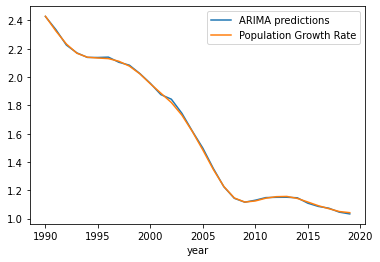

In [12]:
start=len(train)
end=len(train)+len(test)-1
pred=model1.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Population Growth Rate'].plot(legend=True)

In [13]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error

In [14]:
pred

30    2.427919
31    2.334843
32    2.225934
33    2.170581
34    2.138857
35    2.138206
36    2.140728
37    2.104460
38    2.083839
39    2.024594
40    1.955440
41    1.876068
42    1.843446
43    1.744351
44    1.617714
45    1.497715
46    1.354122
47    1.225419
48    1.143486
49    1.116063
50    1.130043
51    1.148491
52    1.150582
53    1.150923
54    1.147145
55    1.108966
56    1.086209
57    1.073703
58    1.045699
59    1.033196
Name: ARIMA predictions, dtype: float64

In [17]:
dff['Population Growth Rate Forecast']=pred

In [18]:
dff.tail()

,year,co2,lifeexpectancy,Infant Mortality Rate,Population Growth Rate,Fertility Rate,GDPpercapita,IPopulation Growth Rate,Population Growth Rate Forecast
55,2015,0.459,71.514,3.06,1.117284,2.120,1248.453398,1.108966,1.108966
56,2016,0.467,71.785,2.93,1.091300,2.090,1401.620628,1.086209,1.086209
57,2017,0.493,72.052,2.80,1.070244,2.062,1563.913699,1.073703,1.073703
58,2018,0.513,72.320,2.67,1.050045,2.036,1698.350394,1.045699,1.045699
59,2019,NaN,72.591,2.56,1.042001,NaN,1855.739824,1.033196,1.033196


In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing, Holt

In [20]:
holt=Holt(dff['Population Growth Rate'],exponential=True).fit()

In [21]:
holt_pred = holt.predict(start=start, end=end)

<AxesSubplot:>

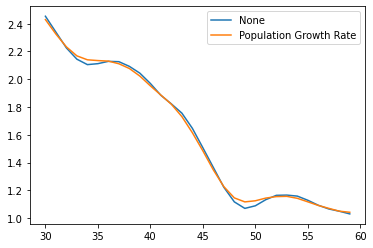

In [22]:
holt_pred.plot(legend=True)
test['Population Growth Rate'].plot(legend=True)

In [22]:
holt_pred

year
1990    9.982782
1991    9.613240
1992    9.224483
1993    8.864275
1994    8.475662
1995    8.115486
1996    7.746163
1997    7.376901
1998    7.026766
1999    6.667585
2000    6.346491
2001    6.026327
2002    5.735158
2003    5.444925
2004    5.202723
2005    4.952381
2006    4.712019
2007    4.481636
2008    4.261231
2009    4.050804
2010    3.850352
2011    3.678914
2012    3.508394
2013    3.347853
2014    3.197293
2015    3.075851
2016    2.917009
2017    2.805523
2018    2.675768
2019    2.546036
dtype: float64

In [23]:
dff['holt forecast']=holt_pred

In [24]:
dff.tail()

,co2,lifeexpectancy,Infant Mortality Rate,Population Growth Rate,Fertility Rate,GDPpercapita,Infant Mortality Rate forecast,holt forecast
year,,,,,,,,
2015,0.459,71.514,3.06,1.091300,2.120,1248.453398,3.069003,3.075851
2016,0.467,71.785,2.93,1.070244,2.090,1401.620628,2.917053,2.917009
2017,0.493,72.052,2.80,1.050045,2.062,1563.913699,2.796573,2.805523
2018,0.513,72.320,2.67,1.042001,2.036,1698.350394,2.671889,2.675768
2019,NaN,72.591,2.56,NaN,NaN,1855.739824,2.539718,2.546036


In [25]:
dff.to_excel('save2_file.xlsx')